## Task 2: Exploratory Data Analysis of New Testament Audio and Text

**Problem Statement:**

The objective of this task is to conduct a comprehensive exploratory data analysis (EDA) on the audio and text data of the 260 chapters of the New Testament in your mother tongue (excluding English). The data should be obtained through web scraping from [Faith Comes By Hearing](https://www.faithcomesbyhearing.com/).

The workflow for this task should include:
1. **Web Scraping:** Systematically download the audio files and their corresponding textual content for each of the 260 chapters of the New Testament from the specified website.
2. **Data Preparation:** Organize the data by chapters, ensuring each audio file is matched with its corresponding text.
3. **Exploratory Data Analysis:** Analyze the data to uncover patterns, anomalies, or insights that could benefit applications such as Text to Speech (TTS) and Speech to Text (STT) technologies. Your analysis should explore various facets of the data, including audio quality, text clarity, and alignment between text and spoken content.

**Judgement Criteria:**

Your submission will be evaluated based on:
- **Efficiency and Reliability of Web Scraping Techniques:** The methods and tools used for downloading the chapters efficiently and reliably.
- **Data Analysis Methods:** The techniques and approaches used for analyzing the audio and text data.
- **Quality of Data Analysis:** How effectively the analysis addresses potential applications for the Speech team, including TTS and STT technologies.
- **Creativity in Analysis:** Innovative approaches in data handling and analysis, and the use of relevant metrics to assess data quality and applicability.

**Submission Requirements:**

Your submission should include the following components:
- **Report on Key Performance Indicators (KPIs):** A concise report detailing the key findings from your analysis, focusing on aspects that are critical for improving TTS and STT applications.
- **Methodological Explanation:** A thorough explanation of the methods used for both web scraping and the exploratory data analysis. This should include challenges faced and how they were overcome.
- **Supporting Materials:** Include code snippets and visualizations that highlight significant insights from the data. These should be well-documented and easy to understand, demonstrating the logic behind your analytical decisions.

The report should be structured to clearly present the methodology, findings, and implications of your analysis. It should be technical yet accessible, aimed at stakeholders who may have varying levels of familiarity with data analysis techniques.


---



In [ ]:
!pip install selenium bs4
!apt-get update
!apt install chromium-chromedriver


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran

In [ ]:
#dictionary of book and number of chapters
info = {
    'MAT' : 28,
    'MRK' : 16,
    'LUK' : 24,
    'JHN' : 21,
    'ACT' : 28,
    'ROM' : 16,
    '1CO' : 16,
    '2CO' : 13,
    'GAL' : 6,
    'EPH' : 6,
    'PHP' : 4,
    'COL' : 4,
    '1TH' : 5,
    '2TH' : 3,
    '1TI' : 6,
    '2TI' : 4,
    'TIT' : 3,
    'PHM' : 1,
    'HEB' : 13,
    'JAS' : 5,
    '1PE' : 5,
    '2PE' : 3,
    '1JN' : 5,
    '2JN' : 1,
    '3JN' : 1,
    'JUD' : 1,
    'REV' : 22,
}

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium import *
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
import requests
import re
from bs4 import BeautifulSoup
import os
import time


In [ ]:
# Global settings
text_dir = 'text_files'  # Directory to save text files
audio_dir = 'audio_files'  # Directory to save audio files
base_url = 'https://live.bible.is/bible/MALNIB/'  # Base URL for the Bible website
page_load_timeout = 50  # Page load timeout in seconds
implicit_wait_time = 40  # Implicit wait time for Selenium in seconds


In [ ]:
def download_file(url, filename):
    """
    Downloads a file from a URL and saves it locally.
    """
    try:
        response = requests.get(url)  # Send a GET request to the URL
        response.raise_for_status()  # Raise an exception for HTTP errors
        with open(filename, 'wb') as file:  # Open a file for writing in binary mode
            file.write(response.content)  # Write the content of the response to the file
        print(f"Downloaded: {filename}")  # Print success message
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")  # Print error message if download fails


In [ ]:
def extract_text(chapter_url):
    """
    Extracts text from a chapter URL.
    """
    text_content = ''
    try:
        response = requests.get(chapter_url)  # Send a GET request to the chapter URL
        response.raise_for_status()  # Raise an exception for HTTP errors
        soup = BeautifulSoup(response.content, 'html.parser')  # Parse the HTML content with BeautifulSoup
        verse_elements = soup.find_all("span", {"data-verseid": True})  # Find all span elements with a data-verseid attribute
        text_content = "\n".join(verse.get_text(strip=True) for verse in verse_elements)  # Extract text from each verse element and join with newline
    except requests.exceptions.RequestException as e:
        print(f"Failed to extract text from {chapter_url}: {e}")  # Print error message if extraction fails
    return text_content  # Return the extracted text

In [ ]:
def extract_audio(chapter_url):
    """
    Extracts audio URLs from a chapter URL.
    """
    audio_urls = []
    try:
        chrome_options = Options()
        chrome_options.add_argument('--headless')  # Run Chrome in headless mode (without GUI)
        chrome_options.add_argument('--no-sandbox')  # Disable the sandbox for Chrome
        chrome_options.add_argument('--disable-dev-shm-usage')  # Disable shared memory usage for Chrome
        chrome_options.add_argument('--enable-javascript')  # Enable JavaScript in Chrome

        driver = webdriver.Chrome(options=chrome_options)  # Initialize the Chrome WebDriver with the specified options
        driver.set_page_load_timeout(page_load_timeout)  # Set the page load timeout
        driver.implicitly_wait(implicit_wait_time)  # Set the implicit wait time

        driver.get(chapter_url)  # Navigate to the chapter URL
        wait = WebDriverWait(driver, 150)  # Initialize a WebDriverWait with a timeout of 150 seconds
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "audio-player-background")))  # Wait until the audio player background is present

        soup = BeautifulSoup(driver.page_source, "html.parser")  # Parse the page source with BeautifulSoup

        audio_players = soup.find_all("video", {"class": "audio-player"})  # Find all video elements with the class "audio-player"
        audio_urls = [audio_player.get("src") for audio_player in audio_players if audio_player.has_attr("src")]  # Extract the src attribute of each audio player

        driver.quit()  # Quit the WebDriver
    except Exception as e:
        print(f"Failed to extract audio from {chapter_url}: {e}")  # Print error message if extraction fails
        if driver:
            driver.quit()  # Quit the WebDriver if an exception occurs
    return audio_urls  # Return the list of audio URLs

In [ ]:

def extract_text_and_audio(book_id, chapter):
    """
    Extracts text and audio from a specific chapter of a book.
    """
    chapter_url = f"{base_url}/{book_id}/{chapter}"  # Construct the chapter URL

    text_content = extract_text(chapter_url)  # Extract text from the chapter URL
    text_filename = os.path.join(text_dir, f"{book_id}_{chapter}.txt")  # Construct the text filename
    with open(text_filename, "w", encoding="utf-8") as text_file:  # Open the text file for writing with UTF-8 encoding
        text_file.write(text_content)  # Write the extracted text to the file
    print(f"Saved text: {text_filename}")  # Print success message

    audio_urls = extract_audio(chapter_url)  # Extract audio URLs from the chapter URL
    for idx, audio_url in enumerate(audio_urls, start=1):  # Iterate over the audio URLs
        if audio_url:
            audio_filename = os.path.join(audio_dir, f"{book_id}_{chapter}_{idx}.mp3")  # Construct the audio filename
            download_file(audio_url, audio_filename)  # Download the audio file


In [ ]:
def extract_all_text_and_audio():
    """
    Extracts text and audio for all chapters of all books.
    """
    os.makedirs(text_dir, exist_ok=True)  # Create the text directory if it doesn't exist
    os.makedirs(audio_dir, exist_ok=True)  # Create the audio directory if it doesn't exist

    # Process each book in the info dictionary
    for book_id, num_chapters in info.items():  # Iterate over the books and their chapter counts
        print('Processing book', book_id)  # Print the book ID being processed
        for chapter in range(1, num_chapters + 1):  # Iterate over the chapters of the book
            extract_text_and_audio(book_id, chapter)  # Extract text and audio for the chapter


In [ ]:
# Extract text and audio for all chapters of all books
extract_all_text_and_audio()


Processing book MAT
Saved text: text_files/MAT_1.txt
Failed to download _: Invalid URL '_': No scheme supplied. Perhaps you meant https://_?
Saved text: text_files/MAT_2.txt
Failed to extract audio from https://live.bible.is/bible/MALNIB//MAT/2: Message: 
Stacktrace:
#0 0x5beb9220ee3a <unknown>
#1 0x5beb91ef845c <unknown>
#2 0x5beb91f445b5 <unknown>
#3 0x5beb91f44671 <unknown>
#4 0x5beb91f88f14 <unknown>
#5 0x5beb91f674dd <unknown>
#6 0x5beb91f862cc <unknown>
#7 0x5beb91f67253 <unknown>
#8 0x5beb91f371c7 <unknown>
#9 0x5beb91f37b3e <unknown>
#10 0x5beb921d527b <unknown>
#11 0x5beb921d9327 <unknown>
#12 0x5beb921c1dae <unknown>
#13 0x5beb921d9df2 <unknown>
#14 0x5beb921a674f <unknown>
#15 0x5beb921fe128 <unknown>
#16 0x5beb921fe2fb <unknown>
#17 0x5beb9220df6c <unknown>
#18 0x7ebf65a0bac3 <unknown>

Saved text: text_files/MAT_3.txt
Downloaded: audio_files/MAT_3_1.mp3
Saved text: text_files/MAT_4.txt
Downloaded: audio_files/MAT_4_1.mp3
Saved text: text_files/MAT_5.txt
Downloaded: audio_f

In [ ]:
import os # Import the os module for interacting with the operating system
import shutil

In [ ]:
# Directories for storing organized data
organized_dir = '/content/drive/My Drive/organized data/'
text_dir = '/content/text_files'
audio_dir = '/content/audio_files'

In [ ]:
# Create a directory to organize the data by chapters
os.makedirs(organized_dir, exist_ok=True)  # Create the organized directory if it doesn't exist

# Organize the data by chapters
for book_id in info:  # Iterate over each book in the info dictionary
    book_dir = os.path.join(organized_dir, book_id)  # Create a directory for the book
    os.makedirs(book_dir, exist_ok=True)  # Create the book directory if it doesn't exist

    num_chapters = info[book_id]  # Get the number of chapters for the current book
    for chapter in range(1, num_chapters + 1):  # Iterate over each chapter
        chapter_dir = os.path.join(book_dir, f'Chapter_{chapter}')  # Create a directory for the chapter
        os.makedirs(chapter_dir, exist_ok=True)  # Create the chapter directory if it doesn't exist

        # Move the text file
        text_filename = f"{book_id}_{chapter}.txt"  # Construct the text file name
        src_text_path = os.path.join(text_dir, text_filename)  # Construct the source path for the text file
        dest_text_path = os.path.join(chapter_dir, text_filename)  # Construct the destination path for the text file
        if os.path.exists(src_text_path):  # Check if the source text file exists
            shutil.move(src_text_path, dest_text_path)  # Move the text file to the destination

        # Move the audio files
        audio_filenames = [f for f in os.listdir(audio_dir) if f.startswith(f"{book_id}_{chapter}_")]  # Get all audio files for the current chapter
        for audio_filename in audio_filenames:  # Iterate over each audio file
            src_audio_path = os.path.join(audio_dir, audio_filename)  # Construct the source path for the audio file
            dest_audio_path = os.path.join(chapter_dir, audio_filename)  # Construct the destination path for the audio file
            if os.path.exists(src_audio_path):  # Check if the source audio file exists
                shutil.move(src_audio_path, dest_audio_path)  # Move the audio file to the destination

print("Data organized successfully.")  # Print a success message


Data organized successfully.


In [ ]:
import librosa
import matplotlib.pyplot as plt

In [ ]:
# Function to get the duration of an audio file
def get_audio_duration(file_path):
    y, sr = librosa.load(file_path)
    return librosa.get_duration(y=y, sr=sr)

In [ ]:
# Initialize empty lists to store audio durations and text lengths
audio_durations = []
text_lengths = []

# Iterate over each book in the 'info' dictionary
for book_id in info:
    # Construct the path to the directory containing chapters for the current book
    book_dir = os.path.join(organized_dir, book_id)

    # Get the number of chapters for the current book from the 'info' dictionary
    num_chapters = info[book_id]

    # Iterate over each chapter of the current book
    for chapter in range(1, num_chapters + 1):
        # Construct the path to the directory of the current chapter
        chapter_dir = os.path.join(book_dir, f'Chapter_{chapter}')

        # Get the text length for the current chapter
        text_filename = f"{book_id}_{chapter}.txt"
        text_path = os.path.join(chapter_dir, text_filename)

        # Check if the text file exists for the current chapter
        if os.path.exists(text_path):
            # Open the text file and read its content
            with open(text_path, 'r', encoding='utf-8') as file:
                text_content = file.read()
                # Append the length of the text content to the 'text_lengths' list
                text_lengths.append(len(text_content))

        # Get the audio duration for the current chapter
        audio_filenames = [f for f in os.listdir(chapter_dir) if f.endswith('.mp3')]
        for audio_filename in audio_filenames:
            audio_path = os.path.join(chapter_dir, audio_filename)
            # Check if the audio file exists for the current chapter
            if os.path.exists(audio_path):
                # Calculate the duration of the audio file and append it to the 'audio_durations' list
                audio_duration = get_audio_duration(audio_path)
                audio_durations.append(audio_duration)


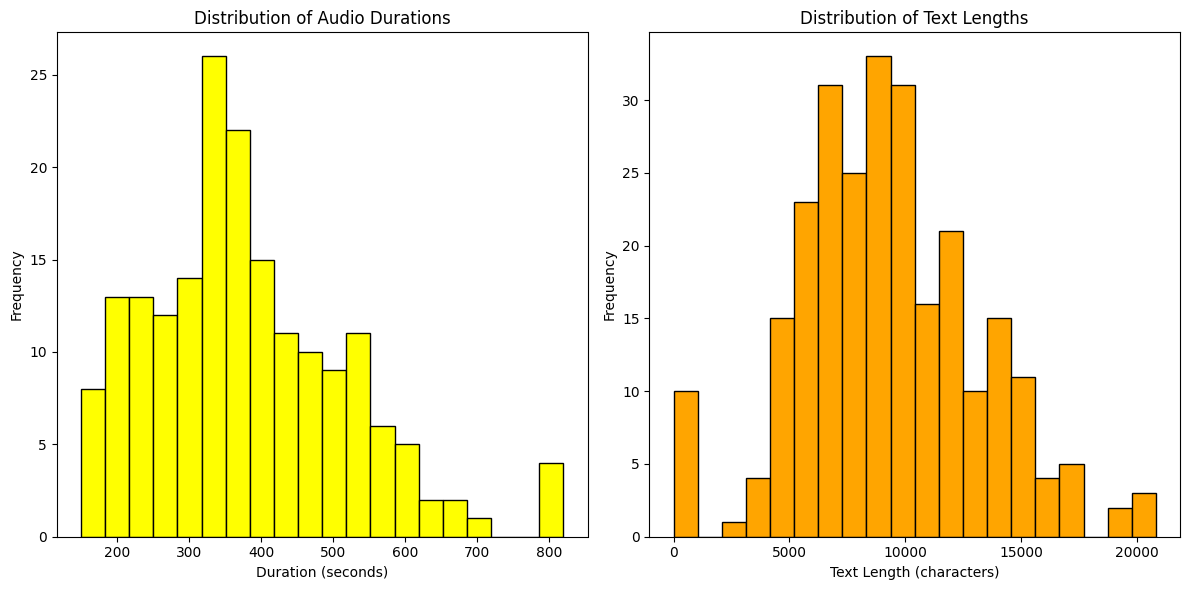

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(audio_durations, bins=20, color='YELLOW', edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(text_lengths, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
!pip install faster_whisper
!pip install transformers
!pip install torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 14.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)


In [ ]:
import torch
import os
from faster_whisper import WhisperModel
from transformers import pipeline, MarianMTModel, MarianTokenizer

# Initialize the Whisper model
model_size = "small"
device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available, otherwise CPU
compute_type = "float16" if device == "cuda" else "float32"
model = WhisperModel(model_size, device=device, compute_type=compute_type)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

model.bin:   0%|          | 0.00/484M [00:00<?, ?B/s]

vocabulary.txt:   0%|          | 0.00/460k [00:00<?, ?B/s]

In [ ]:
# Initialize the translation model
translator = pipeline("translation_en_to_ml", model="Helsinki-NLP/opus-mt-en-ml")

config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/229M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/449k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/614k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/956k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
import os  # Import the os module for interacting with the operating system

exceptaudios = []  # Initialize a list to keep track of audio files that could not be processed
maindirectory = "/content/organized data/"  # Set the main directory path

def split_text(text, max_length):
    """
    Split text into chunks with a maximum length.

    Parameters:
    text (str): The input text to be split.
    max_length (int): The maximum length of each chunk.

    Returns:
    List[str]: A list of text chunks.
    """
    words = text.split()  # Split the text into words
    chunks = []  # Initialize a list to store text chunks
    current_chunk = []  # Initialize a list to store the current chunk
    current_length = 0  # Initialize the current length of the chunk

    for word in words:  # Iterate over each word in the text
        word_length = len(word)  # Get the length of the word
        if current_length + word_length <= max_length:  # Check if the word can be added to the current chunk
            current_chunk.append(word)  # Add the word to the current chunk
            current_length += word_length + 1  # Update the current length (+1 for the space)
        else:  # If the word cannot be added to the current chunk
            chunks.append(" ".join(current_chunk))  # Add the current chunk to the list of chunks
            current_chunk = [word]  # Start a new chunk with the current word
            current_length = word_length + 1  # Update the current length

    if current_chunk:  # If there are words left in the current chunk
        chunks.append(" ".join(current_chunk))  # Add the last chunk to the list of chunks

    return chunks  # Return the list of text chunks

def transcription():
    """
    Transcribe audio files and translate the text to Malayalam.
    """
    for k in info.keys():  # Iterate over each book in the info dictionary
        for chap in range(1, info[k] + 1):  # Iterate over each chapter in the book
            try:
                transcribed_text = ""  # Initialize the transcribed text
                audiopath = f"{maindirectory}/{k}/Chapter_{chap}/{k}_{chap}_1.mp3"  # Construct the audio file path
                if not os.path.exists(audiopath):  # Check if the audio file exists
                    continue  # Skip to the next chapter if the audio file does not exist

                # Transcribe the audio to English text
                segments, _ = model.transcribe(audiopath, beam_size=5, language="en")  # Transcribe the audio file
                english_text = " ".join([segment.text for segment in segments])  # Combine the transcribed segments into a single string

                # Split the text into chunks to fit within the model's token limit
                max_length = 512  # Set the maximum length of each chunk
                chunks = split_text(english_text, max_length)  # Split the text into chunks

                # Translate each chunk and combine the results
                malayalam_translation = ""  # Initialize the Malayalam translation
                for chunk in chunks:  # Iterate over each chunk
                    translation = translator(chunk)[0]['translation_text']  # Translate the chunk
                    malayalam_translation += translation + " "  # Add the translation to the combined result

                # Save the Malayalam text
                with open(f"{maindirectory}/{k}/Chapter_{chap}/{k}_{chap}_transcribed_ml.txt", "w", encoding="utf-8") as f:  # Open the file for writing
                    f.write(malayalam_translation.strip())  # Write the translated text to the file

                print(f"Processed {audiopath}")  # Print a message indicating the file was processed
            except Exception as e:  # If an exception occurs
                exceptaudios.append(audiopath)  # Add the audio file to the list of exceptions
                print(f"Error processing {audiopath}: {e}")  # Print the error message

# Call the transcription function
transcription()  # Start the transcription process

# Print any audio files that couldn't be processed
if exceptaudios:  # If there are audio files that couldn't be processed
    print("The following audio files could not be processed:")  # Print a message
    for audio in exceptaudios:  # Iterate over each audio file
        print(audio)  # Print the audio file path


In [ ]:
import os
import librosa
import pandas as pd

organized_dir = "/content/drive/MyDrive/organized_data"  # Set the directory containing organized data

data = []
non_audio_data = []

# Iterate over each book in the organized directory
for book in os.listdir(organized_dir):
    book_path = os.path.join(organized_dir, book)  # Get the path of the book directory
    if os.path.isdir(book_path):  # Check if the item is a directory
        for chapter in os.listdir(book_path):  # Iterate over each chapter in the book
            _, chapter_id = chapter.split("_")  # Extract the chapter ID from the filename
            chapter_path = os.path.join(book_path, chapter)  # Get the path of the chapter directory
            if os.path.isdir(chapter_path):  # Check if the item is a directory
                audio_path = os.path.join(chapter_path, f'{book}_{chapter_id}_1.mp3')  # Get the path of the audio file
                text_path = os.path.join(chapter_path, f'{book}_{chapter_id}.txt')  # Get the path of the text file
                transcript_path = os.path.join(chapter_path, f'{book}_{chapter_id}_transcribed_ml.txt')  # Get the path of the transcript file

                # Read text file
                with open(text_path, 'r', encoding='utf-8') as file:
                    text = file.read()  # Read the content of the text file

                # Initialize transcript variable
                transcript = ""

                # Check if transcript file exists
                if os.path.exists(transcript_path):
                    with open(transcript_path, 'r', encoding='utf-8') as file:
                        transcript = file.read()  # Read the content of the transcript file
                else:
                    print(f"{transcript_path} does not exist")
                    non_audio_data.append(transcript_path)  # Add the missing transcript file path to the list

                try:
                    # Load audio file
                    y, sr = librosa.load(audio_path, sr=None)  # Load the audio file and its sampling rate

                    # Store data
                    data.append({
                        'book': book,
                        'chapter': chapter,
                        'audio': y,
                        'text': text,
                        'transcript': transcript,
                        'sampling_rate': sr
                    })
                except Exception as e:
                    print(f"Error loading audio file '{audio_path}': {e}")
                    non_audio_data.append(audio_path)  # Add the problematic audio file path to the list
                    # Store data with empty audio array and sampling rate if audio file loading fails
                    data.append({
                        'book': book,
                        'chapter': chapter,
                        'audio': None,
                        'text': text,
                        'transcript': transcript,
                        'sampling_rate': ""
                    })

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


/content/drive/MyDrive/organized_data/JHN/Chapter_7/JHN_7_transcribed_ml.txt does not exist
Error loading audio file '/content/drive/MyDrive/organized_data/JHN/Chapter_7/JHN_7_1.mp3': [Errno 2] No such file or directory: '/content/drive/MyDrive/organized_data/JHN/Chapter_7/JHN_7_1.mp3'
/content/drive/MyDrive/organized_data/JHN/Chapter_10/JHN_10_transcribed_ml.txt does not exist


<ipython-input-64-e3fd8e2d7c11>:39: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)  # Load the audio file and its sampling rate


/content/drive/MyDrive/organized_data/JHN/Chapter_19/JHN_19_transcribed_ml.txt does not exist
Error loading audio file '/content/drive/MyDrive/organized_data/JHN/Chapter_19/JHN_19_1.mp3': [Errno 2] No such file or directory: '/content/drive/MyDrive/organized_data/JHN/Chapter_19/JHN_19_1.mp3'
/content/drive/MyDrive/organized_data/JHN/Chapter_11/JHN_11_transcribed_ml.txt does not exist
/content/drive/MyDrive/organized_data/JHN/Chapter_20/JHN_20_transcribed_ml.txt does not exist
/content/drive/MyDrive/organized_data/JHN/Chapter_13/JHN_13_transcribed_ml.txt does not exist
/content/drive/MyDrive/organized_data/JHN/Chapter_8/JHN_8_transcribed_ml.txt does not exist
/content/drive/MyDrive/organized_data/JHN/Chapter_16/JHN_16_transcribed_ml.txt does not exist
/content/drive/MyDrive/organized_data/JHN/Chapter_4/JHN_4_transcribed_ml.txt does not exist
Error loading audio file '/content/drive/MyDrive/organized_data/JHN/Chapter_4/JHN_4_1.mp3': [Errno 2] No such file or directory: '/content/drive/My

In [ ]:
#converting the dictionary into a dataframe
df = pd.DataFrame(data)

# Displaying the first 5 rows from the dataset/dataframe
df.head()

,book,chapter,audio,text,transcript,sampling_rate
0,JHN,Chapter_7,None,1അതിനുശേഷം യേശു ഗലീല ദേശമാകെ സഞ്ചരിച്ചു. യെഹൂദ...,,
1,JHN,Chapter_10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","1യേശു പറഞ്ഞു, “ഞാന്‍ നിങ്ങളോടു സത്യമായി പറയാം....",,22050
2,JHN,Chapter_19,None,,,
3,JHN,Chapter_11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1ബേഥാന്യയില്‍ ലാസര്‍ എന്നൊരാള്‍ ദീനമായി കിടന്ന...,,22050
4,JHN,Chapter_20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1ആഴ്ചയിലെ ആദ്യത്തെ ദിവസം പുലര്‍ച്ചെ മഗ്ദലക്കാര...,,22050


In [ ]:
len(df)

260

In [ ]:
import pandas as pd
import numpy as np
import ast
import librosa

#calculating sound to noise ratio , it helps to make STT robust

def calculate_duration_and_snr(row):
    try:
        audio_array = row['audio']
        sr = row['sampling_rate']

        # Calculate duration
        duration = librosa.get_duration(y=audio_array, sr=sr)

        # Calculate SNR
        mean_signal = np.mean(audio_array)
        std_signal = np.std(audio_array)
        snr = mean_signal / std_signal

        return duration, snr
    except Exception as e:
        print(f"Error processing row: {e}")
        return None, None

try:
    # Calculate duration and SNR for each row
    df['duration'], df['snr'] = zip(*df.apply(calculate_duration_and_snr, axis=1))
except:
    df['duration'] = ""
    df['snr'] = ""

Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At least one of (y, sr), S, or path must be provided
Error processing row: At 

In [ ]:
df['snr'].describe()

count    221.000000
mean       0.000695
std        0.000670
min       -0.000179
25%        0.000331
50%        0.000522
75%        0.000801
max        0.005163
Name: snr, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

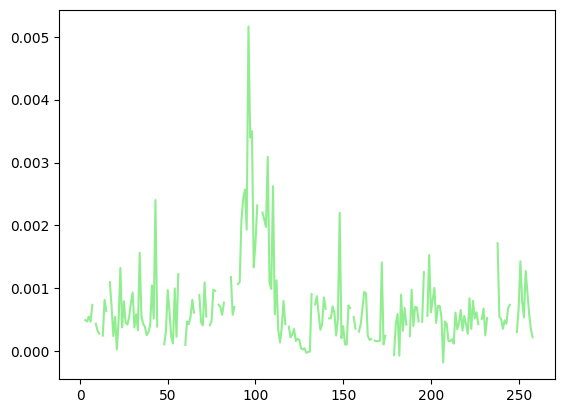

In [ ]:
plt.plot(df['snr'], color = "lightgreen")

In [ ]:

df['duration'].describe()

count    221.000000
mean     374.774638
std      141.027339
min      123.689796
25%      269.557551
50%      354.742857
75%      455.157551
max      820.166531
Name: duration, dtype: float64

Signal-to-Noise Ratio Distribution

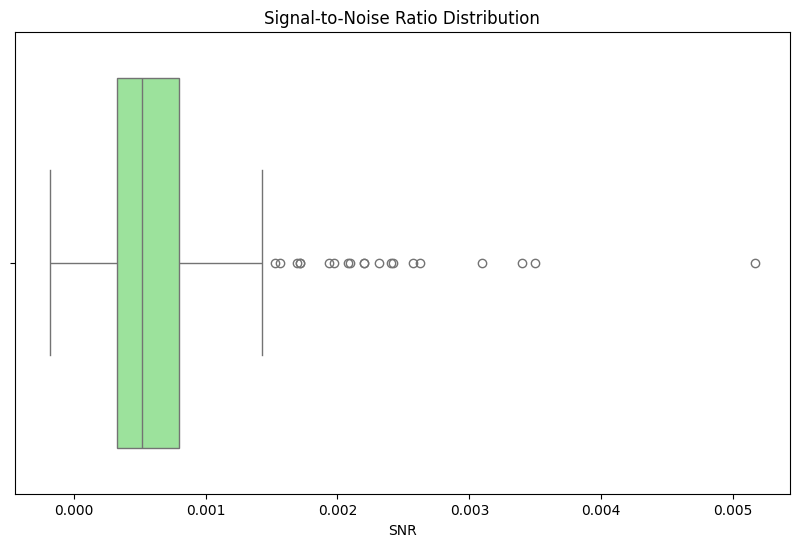

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='snr', color="lightgreen")
plt.title('Signal-to-Noise Ratio Distribution')
plt.xlabel('SNR')
plt.show()


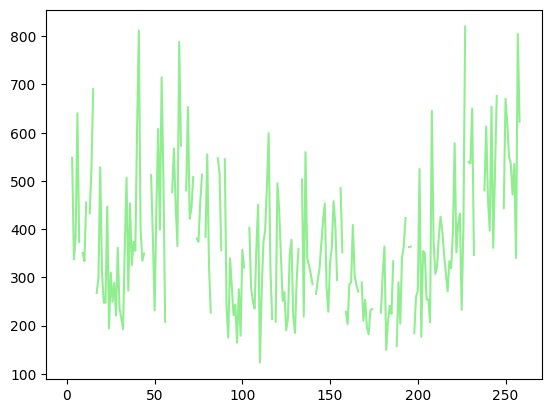

In [ ]:
plt.plot(df['duration'], color = "lightgreen")

Audio Duration Distribution

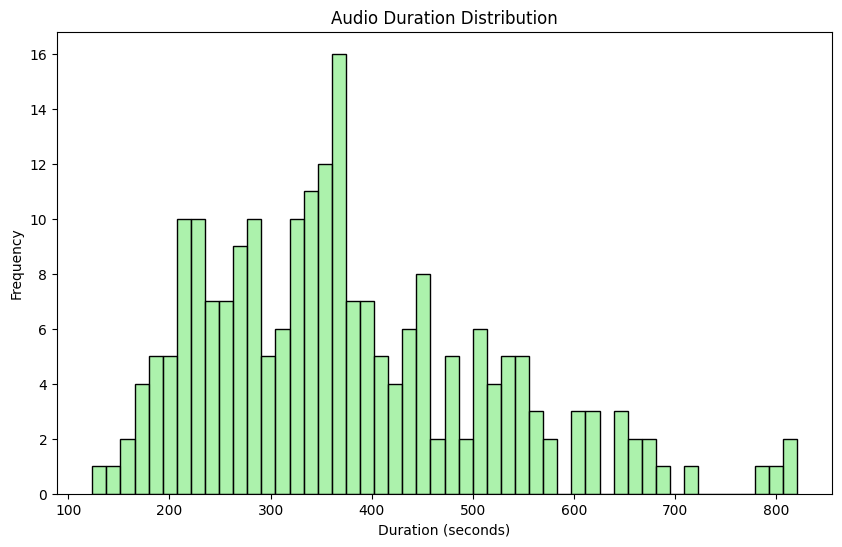

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=50, color="lightgreen")
plt.title('Audio Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

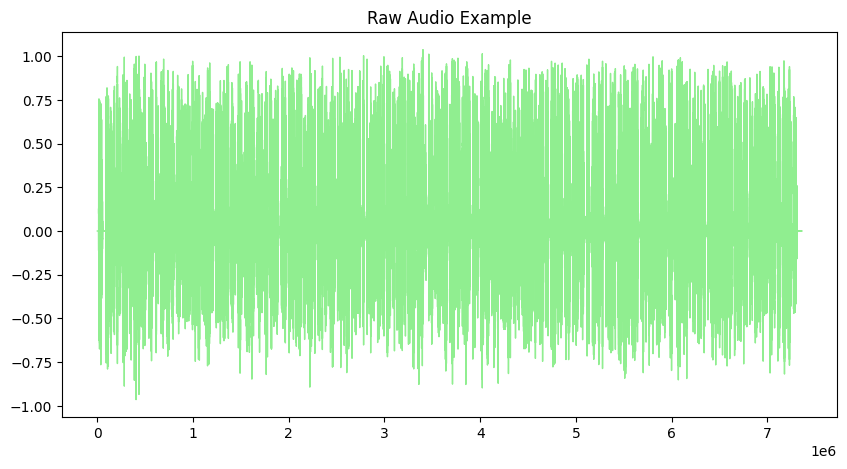

In [ ]:
sample = df["audio"][10]

pd.Series(sample).plot(figsize=(10, 5),
                        lw=1,
                        title='Raw Audio Example',
                        color="lightgreen")
plt.show()

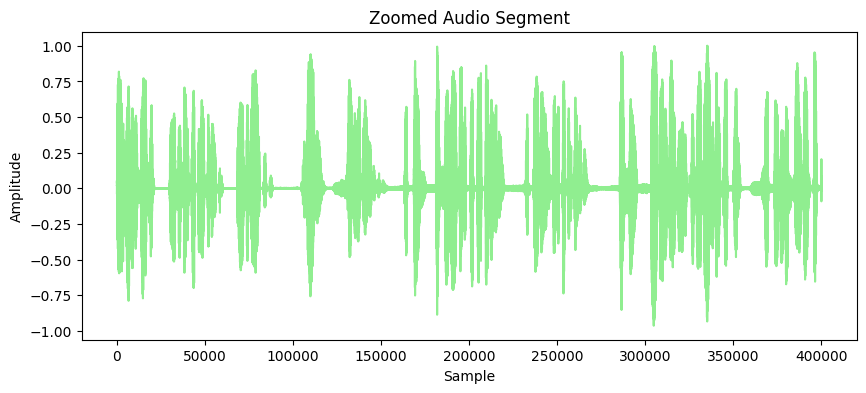

In [ ]:
import matplotlib.pyplot as plt

start_sample = 100000
end_sample = 500000

plt.figure(figsize=(10, 4))
plt.plot(df['audio'][10][start_sample:end_sample], color="lightgreen")
plt.title('Zoomed Audio Segment')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

Signal-to-Noise Ratio Distribution

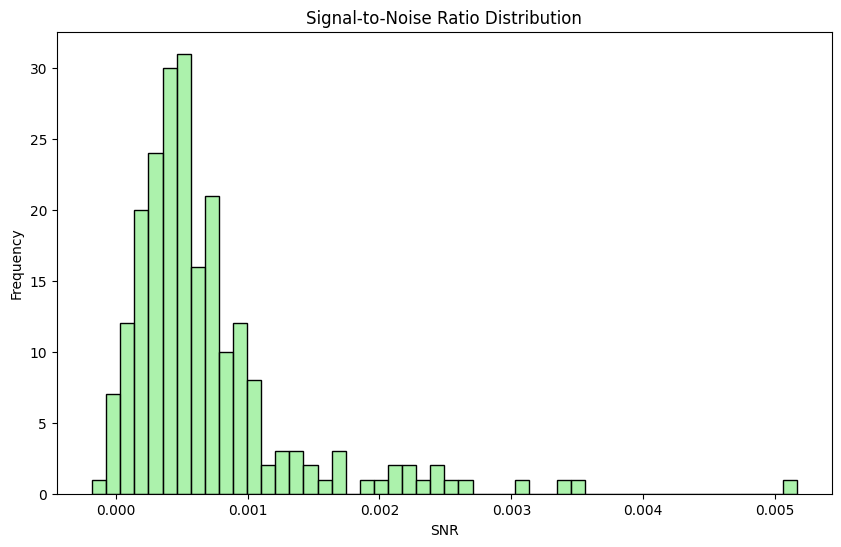

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['snr'], bins=50,color="lightgreen")
plt.title('Signal-to-Noise Ratio Distribution')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.show()


Distribution of Books and Chapters

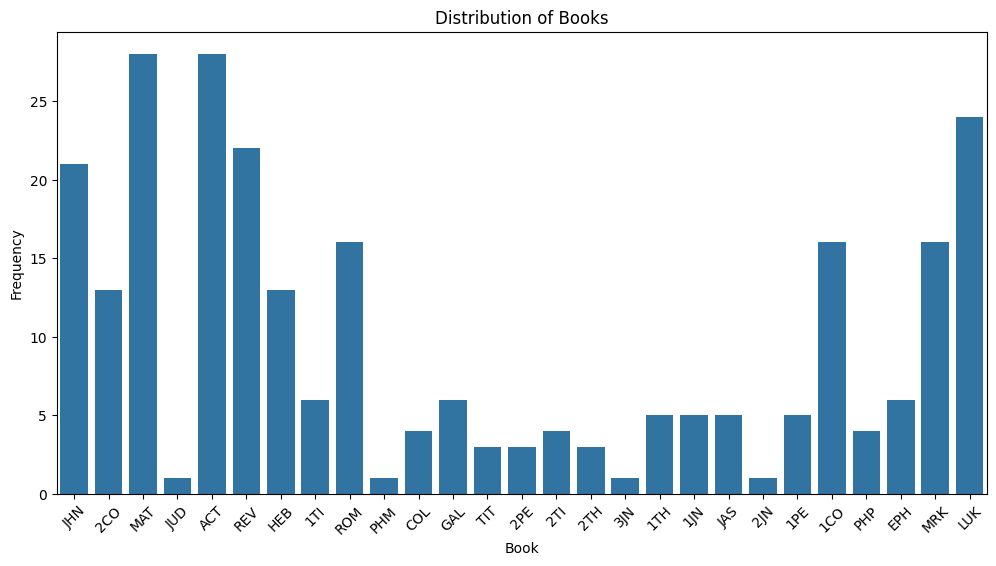

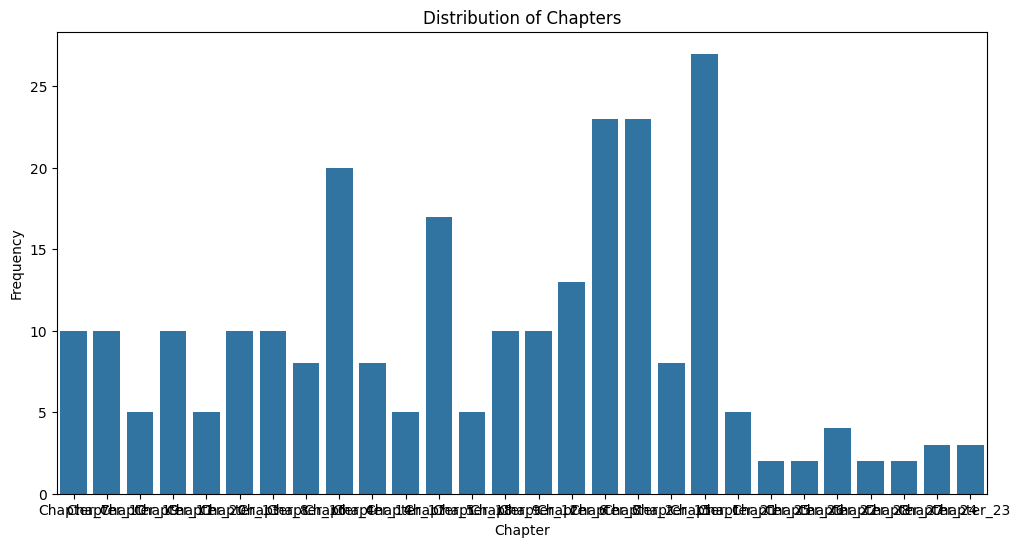

In [ ]:
# Plotting the distribution of books and chapters
plt.figure(figsize=(12, 6))
sns.countplot(x='book', data=df)
plt.title('Distribution of Books')
plt.xlabel('Book')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='chapter', data=df)
plt.title('Distribution of Chapters')
plt.xlabel('Chapter')
plt.ylabel('Frequency')
plt.show()


Distribution of Audio Durations

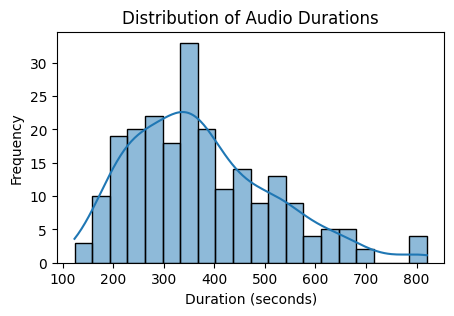

In [ ]:
# Plotting the distribution of audio durations
plt.figure(figsize=(5, 3))
sns.histplot(df['duration'], bins=20, kde=True)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()
